# Softmax Performance

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 10 


/var/folders/7y/8r2t8r0n50g1y4_ygh9sc19m0000gn/T/ipykernel_69288/987358425.py:49: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, 3000)


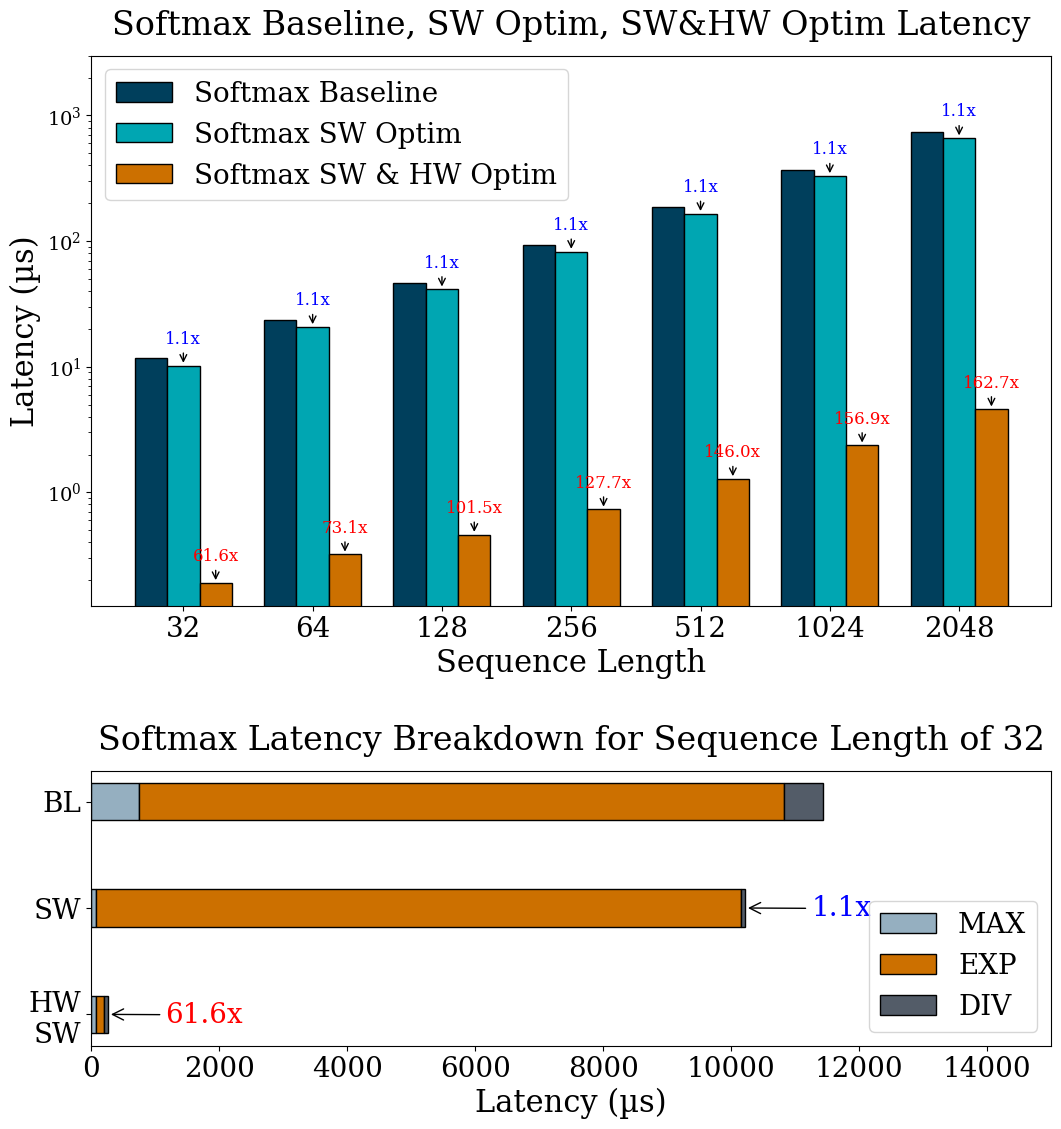

In [6]:
# @title
import matplotlib.pyplot as plt
import numpy as np

# Data for the first bar chart (Stacked Vertical Bar Chart)
categories = ['32', '64', '128', '256', '512', '1024', '2048']
softmax_vals = [11.7, 23.4, 46.7, 93.2, 186.4, 371.0, 745]
softmax_vals_optim = [10.2, 20.7, 41.3, 82.4, 164.8, 329.5, 659]
softmax_vals_optim2 = [0.19, 0.32, 0.46, 0.73, 1.277, 2.365, 4.579]

# Data for the second bar chart (Stacked Horizontal Bar Chart)
categories_2 = ['HW\nSW', 'SW', 'BL']
max_vals = [82, 82, 740]
exp_vals = [124, 10078, 10078]
div_vals = [58, 58, 612]

# Set figure size and create subplots with specific proportions for height
fig = plt.figure(figsize=(12, 11))  # Total width of 12, and height 8 + 3 = 11

# ----------- Plotting the First Chart (Vertical Stacked Bar Chart) -----------
ax1 = fig.add_axes([0.1, 0.45, 0.8, 0.5])  # Increase bottom to add more space between subplots

bar_width = 0.25
index = np.arange(len(categories))

# Colors with related hues but distinct saturation/brightness
max_vals_optim2_color_gemm = '#003f5c'  # 深墨绿色 (上图 max_vals)
max_color_exp = '#00a6b2'  # 较亮的青绿色 (上图 exp_vals)
max_color_exp2 = '#cc7000'  # 饱和的深绿色 (上图 div_vals)

# Stacked bars for the first case (GEMM Optim)
ax1.bar(index, softmax_vals, bar_width, color=max_vals_optim2_color_gemm, edgecolor='black', label='Softmax Baseline')

# Stacked bars for the second case (EXP Optim)
bars_sw_optim = ax1.bar(index + bar_width, softmax_vals_optim, bar_width, color=max_color_exp, edgecolor='black', label='Softmax SW Optim')

# Stacked bars for the third case (SW & HW Optim)
bars_sw_hw_optim = ax1.bar(index + 2 * bar_width, softmax_vals_optim2, bar_width, color=max_color_exp2, edgecolor='black', label='Softmax SW & HW Optim')

# Setting log scale on the y-axis for the first chart
ax1.set_yscale('log')

# Labels and titles for the first chart
ax1.set_xlabel('Sequence Length', fontsize=22)
ax1.set_ylabel('Latency (\u00b5s)', fontsize=22)
ax1.set_title('Softmax Baseline, SW Optim, SW&HW Optim Latency', fontsize=24, pad=15)
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(categories, fontsize=20)
ax1.set_ylim(0, 3000)
ax1.legend(loc='upper left', fontsize=20)
ax1.tick_params(axis='y', which='both', labelsize=14)

# Adding annotations for speedup on SW Optim and SW & HW Optim bars
for i in range(len(categories)):
    # Calculate speedups
    speedup_sw_optim = softmax_vals[i] / softmax_vals_optim[i]
    speedup_sw_hw_optim = softmax_vals[i] / softmax_vals_optim2[i]

    # Annotate for Softmax SW Optim
    ax1.annotate(f'{speedup_sw_optim:.1f}x',
                 xy=(index[i] + bar_width, softmax_vals_optim[i]),
                 xytext=(index[i] + bar_width, softmax_vals_optim[i] * 1.5),
                 arrowprops=dict(facecolor='red', arrowstyle="->"),
                 fontsize=12, color='blue', ha='center')

    # Annotate for Softmax SW & HW Optim
    ax1.annotate(f'{speedup_sw_hw_optim:.1f}x',
                 xy=(index[i] + 2 * bar_width, softmax_vals_optim2[i]),
                 xytext=(index[i] + 2 * bar_width, softmax_vals_optim2[i] * 1.5),
                 arrowprops=dict(facecolor='blue', arrowstyle="->"),
                 fontsize=12, color='red', ha='center')

# ----------- Plotting the Second Chart (Horizontal Stacked Bar Chart) -----------
ax2 = fig.add_axes([0.1, 0.05, 0.8, 0.25])  # Increase the height slightly to provide better readability

bar_width_2 = 0.07
y_positions = np.linspace(0, len(categories_2) - 1, len(categories_2)) * 0.2  # Make bars closer

# Colors with different brightness/saturation to link with the first plot but distinct enough
max_vals_color_2 = '#95afc0' # 较亮的墨绿色 (下图 max_vals)
exp_vals_color_2 = '#cc7000'  # 更浅的青绿色 (下图 exp_vals)
div_vals_color_2 = '#535c68'  # 更亮的饱和绿色 (下图 div_vals)

# Plot the stacked horizontal bars
ax2.barh(y_positions, max_vals, color=max_vals_color_2, edgecolor='black', label='MAX', height=bar_width_2)
ax2.barh(y_positions, exp_vals, left=max_vals, color=exp_vals_color_2, edgecolor='black', label='EXP', height=bar_width_2)
ax2.barh(y_positions, div_vals, left=np.add(max_vals, exp_vals), color=div_vals_color_2, edgecolor='black', label='DIV', height=bar_width_2)

# Set labels and limits for the second chart
ax2.set_xlabel('Latency (\u00b5s)', fontsize=22)
ax2.set_xlim(0, 15000)
ax2.set_yticks(y_positions)
ax2.set_yticklabels(categories_2, fontsize=22)

# Adding a legend to the second chart
legend = ax2.legend(loc='lower right', fontsize=20)

# Setting tick parameters to match the style for the second chart
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

# Adding the title for the second chart
ax2.set_title('Softmax Latency Breakdown for Sequence Length of 32', fontsize=24, pad=15)

# Adding an annotation with a red arrow and label "100x" for the first row ("HW SW")
# Determine the total value at the end of "HW SW"
total_hw_sw = max_vals[0] + exp_vals[0] + div_vals[0]
ax2.annotate('61.6x',
             xy=(total_hw_sw, y_positions[0]), xytext=(total_hw_sw + 1500, y_positions[0] -0.015),
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             fontsize=20, color='red', ha='center')

# Adding an annotation with a red arrow and label "1.2x" for the second row ("SW")
# Determine the total value at the end of "SW"
total_sw = max_vals[1] + exp_vals[1] + div_vals[1]
ax2.annotate('1.1x',
             xy=(total_sw, y_positions[1]), xytext=(total_sw + 1500, y_positions[1] -0.015),
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             fontsize=20, color='blue', ha='center')

# Save the figure as a PDF file
plt.savefig('combined_softmax_latency_chart_with_speedup_annotations.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

# Show the combined plot
plt.show()


# Softmax Engergy

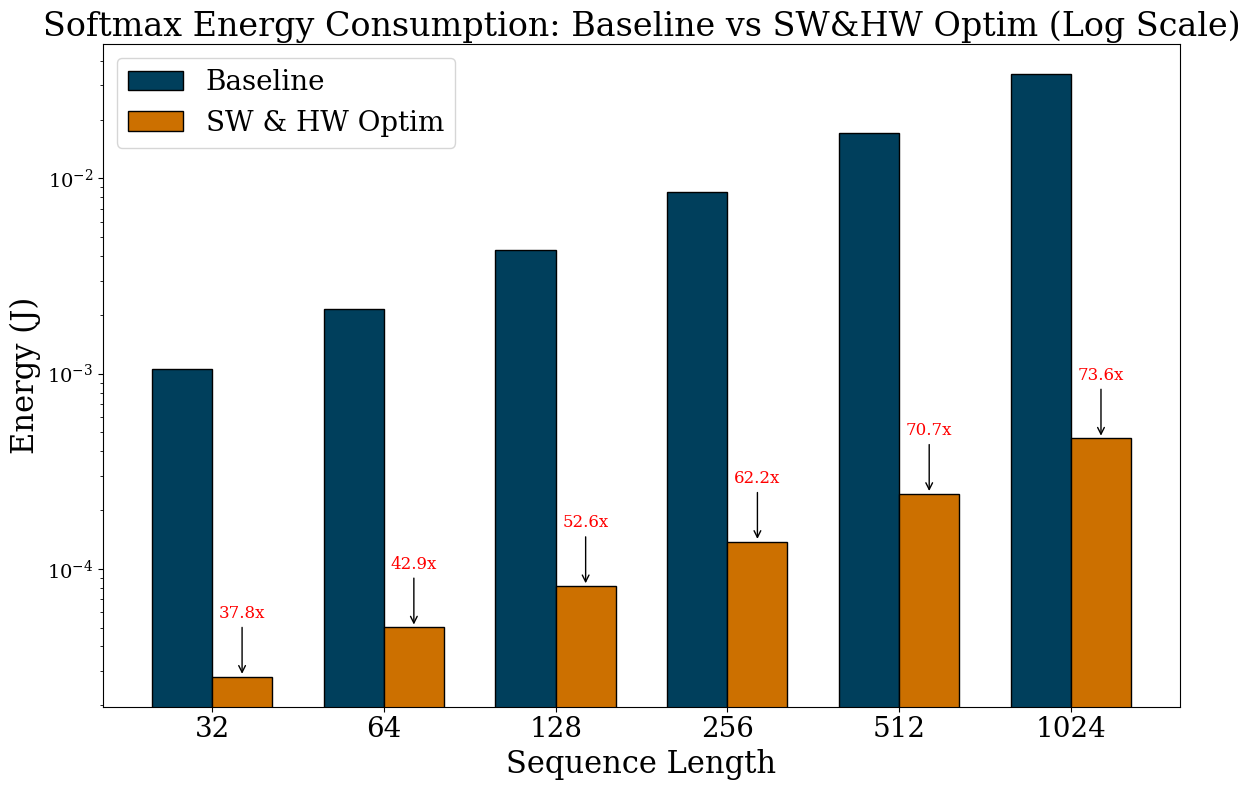

In [21]:
# @title
# Data for the energy comparison
categories = ['32', '64', '128', '256', '512', '1024']

# Baseline power and latency (in ms)
baseline_power = 0.1039  # in Watts
baseline_latency = [10.2, 20.7, 41.3, 82.4, 164.817, 329.553]  # in ms

# SW&HW Optim power and latency (in ms)
sw_hw_power = [0.1476, 0.1567, 0.1774, 0.1886, 0.1898, 0.1968]  # in Watts
sw_hw_latency = [0.19, 0.32, 0.46, 0.73, 1.277, 2.365]  # in ms

# Calculate energy consumption (Energy = Power * Latency in Joules)
baseline_energy = [baseline_power * latency / 1000 for latency in baseline_latency]  # Joules
sw_hw_energy = [power * latency / 1000 for power, latency in zip(sw_hw_power, sw_hw_latency)]  # Joules

baseline_color = '#003f5c'  # Deep green for Baseline
sw_hw_color = '#cc7000'    # Turquoise for SW&HW Optim


# Plot the energy comparison
bar_width = 0.35
index = np.arange(len(categories))

# Re-plot with log scale for the y-axis
fig, ax = plt.subplots(figsize=(12, 8))

# Bars for energy consumption
ax.bar(index, baseline_energy, bar_width, color=baseline_color, edgecolor='black', label='Baseline')
ax.bar(index + bar_width, sw_hw_energy, bar_width, color=sw_hw_color, edgecolor='black', label='SW & HW Optim')

# Annotating the speedups in energy
for i in range(len(categories)):
    # Calculate energy efficiency improvement
    energy_reduction = baseline_energy[i] / sw_hw_energy[i]

    # Annotate for SW&HW Optim
    ax.annotate(f'{energy_reduction:.1f}x',
                xy=(index[i] + bar_width, sw_hw_energy[i]),
                xytext=(index[i] + bar_width, sw_hw_energy[i] * 2),
                arrowprops=dict(facecolor='red', arrowstyle="->"),
                fontsize=12, color='red', ha='center')

# Labels and titles
ax.set_xlabel('Sequence Length', fontsize=22)
ax.set_ylabel('Energy (J)', fontsize=22)
ax.set_title('Softmax Energy Consumption: Baseline vs SW&HW Optim (Log Scale)', fontsize=24)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, fontsize=20)
ax.set_yscale('log')
ax.tick_params(axis='y', which='both', labelsize=14)
ax.legend(loc='upper left', fontsize=20)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('energy_comparison_log_scale.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


# Flashattention Performance(not updated)

latency or peak throughput?

d 64 screen seq L from 32-2048

/var/folders/7y/8r2t8r0n50g1y4_ygh9sc19m0000gn/T/ipykernel_16970/3931155919.py:67: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 40)  # Increased y-axis range


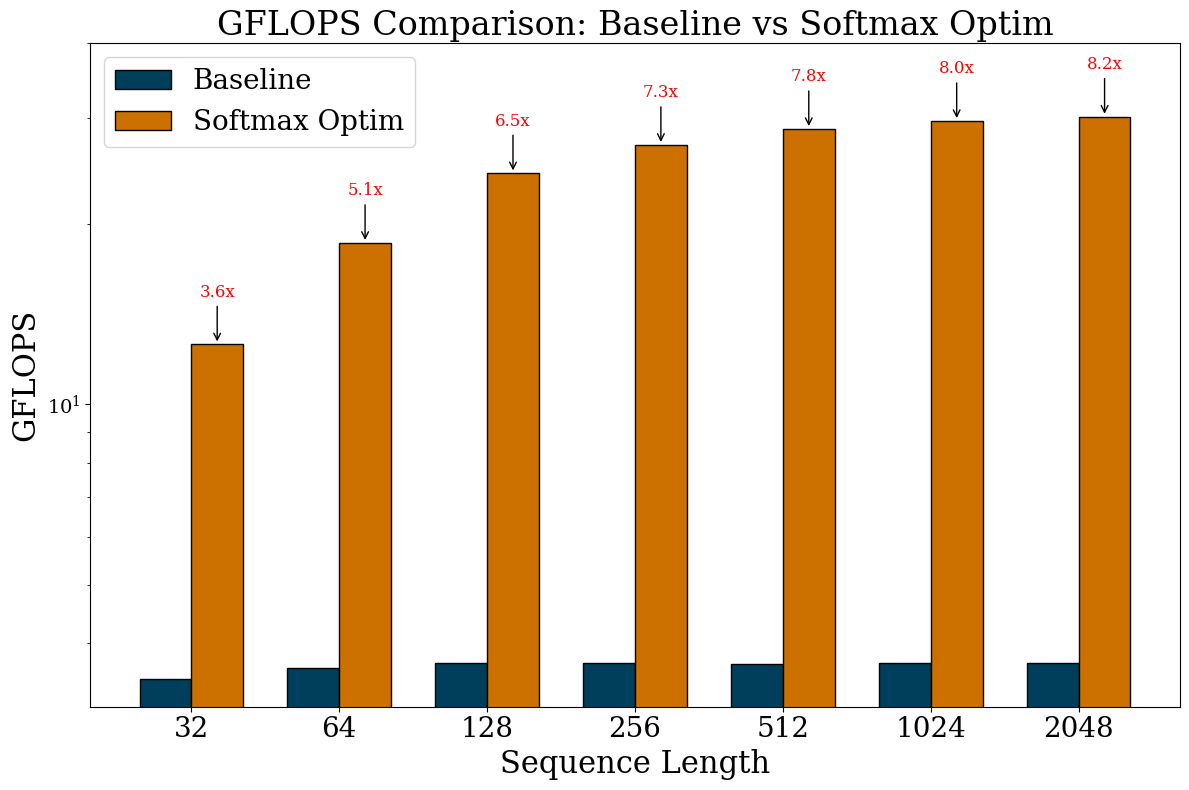

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data for GFLOPS
categories = ['32', '64', '128', '256', '512', '1024', '2048']

# GFLOP values for the sequence lengths
gflop_values = [2.62E-04, 1.07E-03, 4.27E-03, 1.71E-02, 6.83E-02, 2.73E-01, 1.09]

# Updated latencies for Baseline and Optimized (in ms)
baseline_latency = [76, 146, 295, 591, 1189, 2386, 4782]
exp_latency = [21, 28.6, 48, 86.9, 164, 319.6, 629.9]

# Calculate GFLOPS for Baseline and Optimized
baseline_gflops = [
3.49E+00,
3.64E+00,
3.71E+00,
3.70E+00,
3.69E+00,
3.71E+00,
3.70E+00
]  # GFLOPS
exp_gflops = [
1.26E+01,
1.86E+01,
2.43E+01,
2.71E+01,
2.88E+01,
2.97E+01,
3.02E+01
]  # GFLOPS

# Plot settings
bar_width = 0.35
index = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(12, 8))

# Colors for the bars
baseline_color = '#003f5c'  # Deep green for Baseline
exp_color = '#cc7000'       # Turquoise for Optimized

# Bars for GFLOPS
ax.bar(index, baseline_gflops, bar_width, color=baseline_color, edgecolor='black', label='Baseline')
ax.bar(index + bar_width, exp_gflops, bar_width, color=exp_color, edgecolor='black', label='Softmax Optim')

# Annotating the speedups in GFLOPS
for i in range(len(categories)):
    # Calculate GFLOPS improvement
    gflops_improvement = exp_gflops[i] / baseline_gflops[i]

    # Annotate for Optimized GFLOPS
    ax.annotate(f'{gflops_improvement:.1f}x',
                xy=(index[i] + bar_width, exp_gflops[i]),
                xytext=(index[i] + bar_width, exp_gflops[i] * 1.2),  # Adjusted text position to fit within extended range
                arrowprops=dict(facecolor='red', arrowstyle="->"),
                fontsize=12, color='red', ha='center')

# Labels and titles
ax.set_xlabel('Sequence Length', fontsize=22)
ax.set_ylabel('GFLOPS', fontsize=22)
ax.set_title('GFLOPS Comparison: Baseline vs Softmax Optim', fontsize=24)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, fontsize=20)
ax.set_yscale('log')
ax.set_ylim(0, 40)  # Increased y-axis range
ax.tick_params(axis='y', which='both', labelsize=14)
ax.legend(loc='upper left', fontsize=20)

# Save the updated figure as a PDF file
plt.tight_layout()
plt.savefig('gflops_comparison_extended_yaxis.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


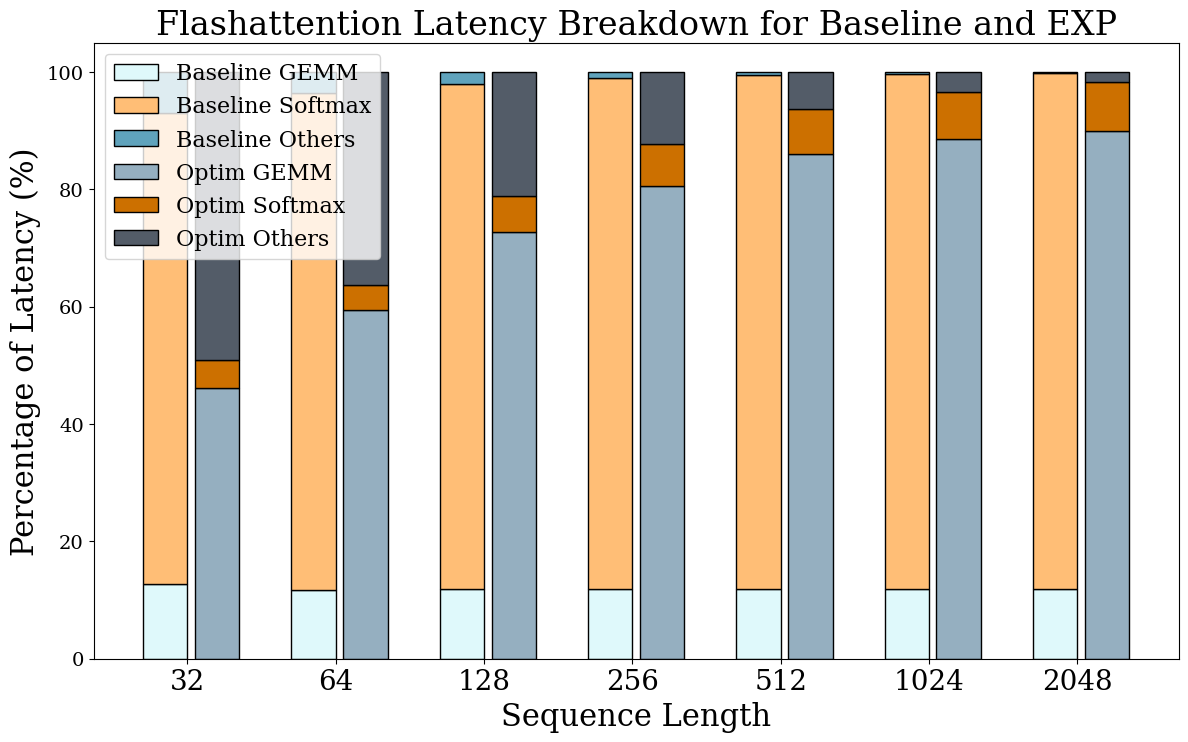

In [36]:
# @title
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['32', '64', '128', '256', '512', '1024', '2048']

# Baseline Latency breakdown (GEMM, Softmax, and Others)
baseline_total_latency = [76, 146, 295, 591, 1189, 2386, 4782]
baseline_gemm_latency = [9.7, 17, 35, 70, 142, 284, 568]
baseline_softmax_latency = [60.95, 123.7, 254, 515, 1042, 2096, 4208]
baseline_other_latency = [total - gemm - softmax for total, gemm, softmax in zip(baseline_total_latency, baseline_gemm_latency, baseline_softmax_latency)]

# EXP Latency breakdown (GEMM, Softmax, and Others)
exp_total_latency = [21, 28.6, 48, 86.9, 164, 319.6, 629.9]
exp_gemm_latency = [9.7, 17, 34.9, 70, 141, 283, 566.8]
exp_softmax_latency = [1, 1.2, 3, 6.2, 12.8, 26, 52.8]
exp_other_latency = [total - gemm - softmax for total, gemm, softmax in zip(exp_total_latency, exp_gemm_latency, exp_softmax_latency)]

# Convert to percentage for stacked bar
baseline_gemm_percentage = [gemm / total * 100 for gemm, total in zip(baseline_gemm_latency, baseline_total_latency)]
baseline_softmax_percentage = [softmax / total * 100 for softmax, total in zip(baseline_softmax_latency, baseline_total_latency)]
baseline_other_percentage = [other / total * 100 for other, total in zip(baseline_other_latency, baseline_total_latency)]

exp_gemm_percentage = [gemm / total * 100 for gemm, total in zip(exp_gemm_latency, exp_total_latency)]
exp_softmax_percentage = [softmax / total * 100 for softmax, total in zip(exp_softmax_latency, exp_total_latency)]
exp_other_percentage = [other / total * 100 for other, total in zip(exp_other_latency, exp_total_latency)]

bar_width = 0.3
index = np.arange(len(categories))
# Re-plot with adjusted colors for EXP (blue-green tones)
fig, ax = plt.subplots(figsize=(14, 8))

# Updated colors for EXP
exp_gemm_color = '#008080'       # Teal for GEMM
exp_softmax_color = '#40E0D0'    # Turquoise for Softmax
exp_other_color = '#20B2AA'      # Light Sea Green for Others

# Stacked bar chart for Baseline
ax.bar(index, baseline_gemm_percentage, bar_width, label='Baseline GEMM', edgecolor='black',color='#dff9fb')
ax.bar(index, baseline_softmax_percentage, bar_width, bottom=baseline_gemm_percentage, label='Baseline Softmax', edgecolor='black', color='#ffbe76')
ax.bar(index, baseline_other_percentage, bar_width, bottom=np.array(baseline_gemm_percentage) + np.array(baseline_softmax_percentage),  edgecolor='black',label='Baseline Others', color='#60a3bc')

# Stacked bar chart for EXP
ax.bar(index + bar_width+0.05, exp_gemm_percentage, bar_width, label='Optim GEMM', color='#95afc0', edgecolor='black')
ax.bar(index + bar_width+0.05, exp_softmax_percentage, bar_width, bottom=exp_gemm_percentage, label='Optim Softmax', color='#cc7000', edgecolor='black')
ax.bar(index + bar_width+0.05, exp_other_percentage, bar_width, bottom=np.array(exp_gemm_percentage) + np.array(exp_softmax_percentage), label='Optim Others', color='#535c68', edgecolor='black')

# Labels and titles
ax.set_xlabel('Sequence Length', fontsize=22)
ax.set_ylabel('Percentage of Latency (%)', fontsize=22)
ax.set_title('Flashattention Latency Breakdown for Baseline and EXP', fontsize=24)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, fontsize=20)
ax.legend(loc='upper left', fontsize=16)
ax.tick_params(axis='y', which='both', labelsize=14)

# Save the updated figure as a PDF file
plt.savefig('Flashattention_latency_breakdown_percentage_comparison_updated_colors.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

# Show the updated plot
plt.show()



# Flashattention Energy Efficiency


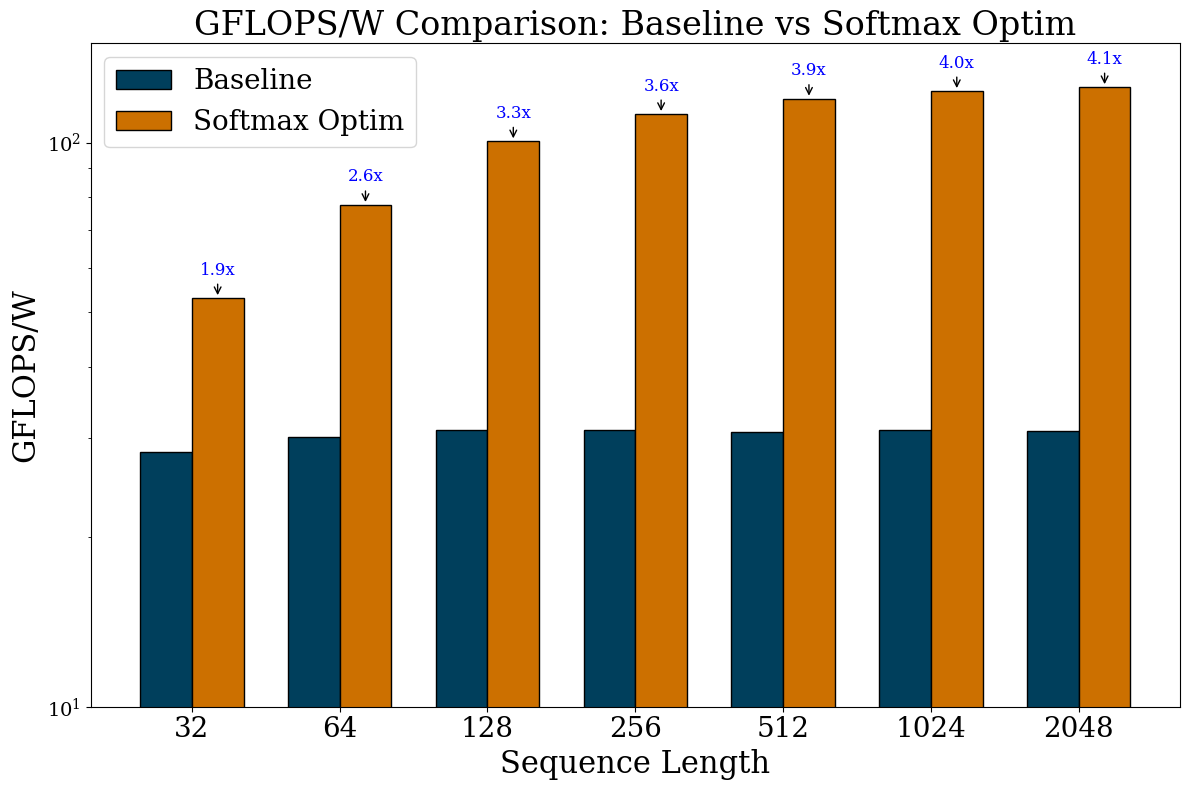

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data for GFLOPS/W
categories = ['32', '64', '128', '256', '512', '1024', '2048']

baseline_gflops_per_w = [
    28.31, 30.10, 30.95, 30.89, 30.74, 30.97, 30.85
]  # Baseline GFLOPS/W
exp_gflops_per_w = [
    53.05, 77.60, 100.62, 112.48, 119.74, 123.53, 125.52
]  # Optimized GFLOPS/W

# Plot settings
bar_width = 0.35
index = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(12, 8))

# Colors for the bars
baseline_color = '#003f5c'  # Deep green for Baseline
exp_color = '#cc7000'       # Turquoise for Optimized

# Bars for GFLOPS/W
ax.bar(index, baseline_gflops_per_w, bar_width, color=baseline_color, edgecolor='black', label='Baseline')
ax.bar(index + bar_width, exp_gflops_per_w, bar_width, color=exp_color, edgecolor='black', label='Softmax Optim')

# Annotating the speedups in GFLOPS/W
for i in range(len(categories)):
    # Calculate GFLOPS/W improvement
    gflops_w_improvement = exp_gflops_per_w[i] / baseline_gflops_per_w[i]

    # Annotate for Optimized GFLOPS/W
    ax.annotate(f'{gflops_w_improvement:.1f}x',
                xy=(index[i] + bar_width, exp_gflops_per_w[i]),
                xytext=(index[i] + bar_width, exp_gflops_per_w[i] * 1.1),  # Adjusted text position to fit within extended range
                arrowprops=dict(facecolor='blue', arrowstyle="->"),
                fontsize=12, color='blue', ha='center')

# Labels and titles
ax.set_xlabel('Sequence Length', fontsize=22)
ax.set_ylabel('GFLOPS/W', fontsize=22)
ax.set_title('GFLOPS/W Comparison: Baseline vs Softmax Optim', fontsize=24)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, fontsize=20)
ax.set_yscale('log')
ax.set_ylim(10, 150)  # Adjusted y-axis range
ax.tick_params(axis='y', which='both', labelsize=14)
ax.legend(loc='upper left', fontsize=20)

# Save the updated figure as a PDF file
plt.tight_layout()
plt.savefig('gflops_per_w_comparison.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


# Scalability

GPT2 small, Vit NAR 1. Peak Throughput with Sequence Length 32-2048
                    2. Energy/Energy?
                    

# Power

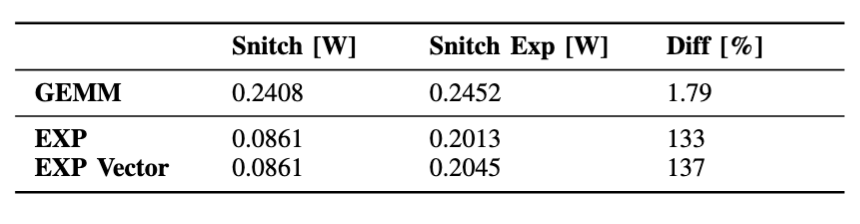

# Area
remaking(fixed fpu ungroup issue)